Epoch 0, RMSE: 195500.5463, LR: 0.099000
Epoch 100, RMSE: 70755.1475, LR: 0.036237
Epoch 200, RMSE: 70086.3819, LR: 0.013264
Epoch 300, RMSE: 69937.8403, LR: 0.004855
Epoch 400, RMSE: 69892.2215, LR: 0.001777
Epoch 500, RMSE: 69876.5474, LR: 0.000650
Epoch 600, RMSE: 69870.9408, LR: 0.000238
Epoch 700, RMSE: 69868.9058, LR: 0.000087
Epoch 800, RMSE: 69868.1632, LR: 0.000032
Epoch 900, RMSE: 69867.8917, LR: 0.000012
Epoch 1000, RMSE: 69867.7924, LR: 0.000004
Epoch 1100, RMSE: 69867.7560, LR: 0.000002
Epoch 1200, RMSE: 69867.7427, LR: 0.000001
Epoch 1300, RMSE: 69867.7379, LR: 0.000000
Epoch 1400, RMSE: 69867.7361, LR: 0.000000
Epoch 1500, RMSE: 69867.7354, LR: 0.000000
Epoch 1600, RMSE: 69867.7352, LR: 0.000000
Epoch 1700, RMSE: 69867.7351, LR: 0.000000
Epoch 1800, RMSE: 69867.7351, LR: 0.000000
Epoch 1900, RMSE: 69867.7350, LR: 0.000000

Batch GD Results:
Train RMSE: 69867.7350
Test RMSE:  71155.6690
Train R²:   0.6348
Test R²:    0.6136


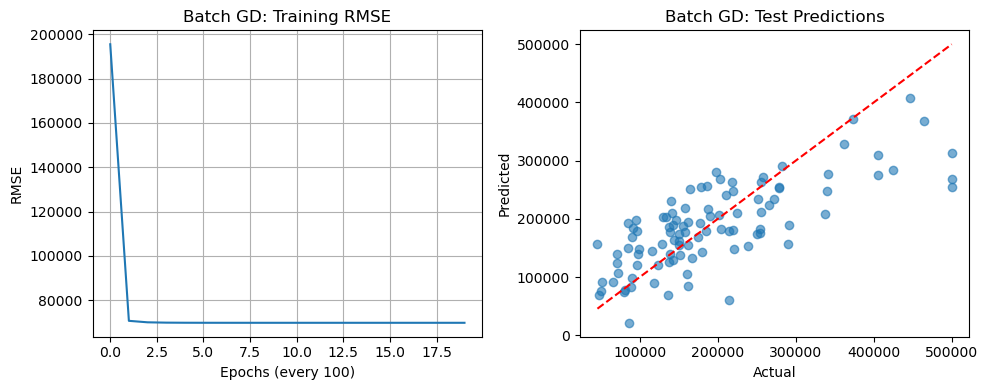

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score
df = pd.read_csv('housing.csv')

# Use numeric features only, last numeric column as target
numeric_cols = df.select_dtypes(include=[np.number]).columns
target_col = numeric_cols[-1]
X = df[numeric_cols[:-1]].fillna(df[numeric_cols[:-1]].median()).values  # Impute NaN
y = df[target_col].fillna(df[target_col].median()).values

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]  # Shape: (n_samples, n_features+1)
y = y.reshape(-1, 1)

# Scale features (columns 1:)
scaler = StandardScaler()
X[:, 1:] = scaler.fit_transform(X[:, 1:])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def batch_gradient_descent(X, y, learning_rate=0.1, n_epochs=1000, decay_rate=0.99):
    m = len(y)
    n_features = X.shape[1]
    theta = np.random.randn(n_features, 1) * 0.01  # Small random init
    
    train_errors = []
    lr_schedule = learning_rate
    
    for epoch in range(n_epochs):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= lr_schedule * gradients
        
        # Learning rate decay
        lr_schedule *= decay_rate
        
        if epoch % 100 == 0:
            train_err = root_mean_squared_error(y, X.dot(theta))
            train_errors.append(train_err)
            print(f"Epoch {epoch}, RMSE: {train_err:.4f}, LR: {lr_schedule:.6f}")
    
    return theta, train_errors

# Train
theta_batch, train_errors_batch = batch_gradient_descent(X_train, y_train, n_epochs=2000)

# Predict and evaluate
y_train_pred_batch = X_train.dot(theta_batch)
y_test_pred_batch = X_test.dot(theta_batch)

print("\nBatch GD Results:")
print(f"Train RMSE: {root_mean_squared_error(y_train, y_train_pred_batch):.4f}")
print(f"Test RMSE:  {root_mean_squared_error(y_test, y_test_pred_batch):.4f}")
print(f"Train R²:   {r2_score(y_train, y_train_pred_batch):.4f}")
print(f"Test R²:    {r2_score(y_test, y_test_pred_batch):.4f}")

# Plot convergence
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_errors_batch)
plt.title('Batch GD: Training RMSE')
plt.xlabel('Epochs (every 100)')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test[:100], y_test_pred_batch[:100], alpha=0.6)
plt.plot([y_test[:100].min(), y_test[:100].max()], [y_test[:100].min(), y_test[:100].max()], 'r--')
plt.title('Batch GD: Test Predictions')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()
